In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
from sklearn.linear_model import RANSACRegressor
import cv2
import math

In [292]:
def read_data(m,n,filepath):
	data = pd.read_csv(filepath, delim_whitespace=True, usecols=[0], header=None, skiprows=1)
	mat = np.flip(data.to_numpy().reshape(m, n),axis=0)
	return mat

def gray_img(mat,vmin=-10,vmax=10):
	# plot gray image
	plt.figure(figsize=(12, 12))
	plt.imshow(mat, cmap='gray',vmin=vmin,vmax=vmax)#,vmin=-849, vmax=-611)#
	plt.colorbar()
	plt.title('Gray Scale Image')
	plt.show()

def flatten(mat):
    # fit line
    flat_mat = np.zeros_like(mat)
    x = np.arange(mat.shape[1]).reshape(-1, 1)
    ransac = RANSACRegressor()
    
    for i in range(0, mat.shape[0]):
        ransac.fit(x, mat[i,].reshape(-1, 1))
        slope = ransac.estimator_.coef_
        intercept = ransac.estimator_.intercept_
        y = slope * x + intercept
        flat_mat[i, :] = (mat[i, :] - y.ravel()) 

    fstd = flat_mat.std()
    me = np.mean(np.abs(flat_mat))
    flat_mat = np.where(flat_mat > fstd, me, flat_mat)
    flat_mat = np.where(flat_mat < -fstd, -me, flat_mat)
    return flat_mat




In [28]:
path = "0620S1pA6.021.txt"#"0620S1A1.005.txt" #
n=512
m=475
data = read_data(m,n, path)

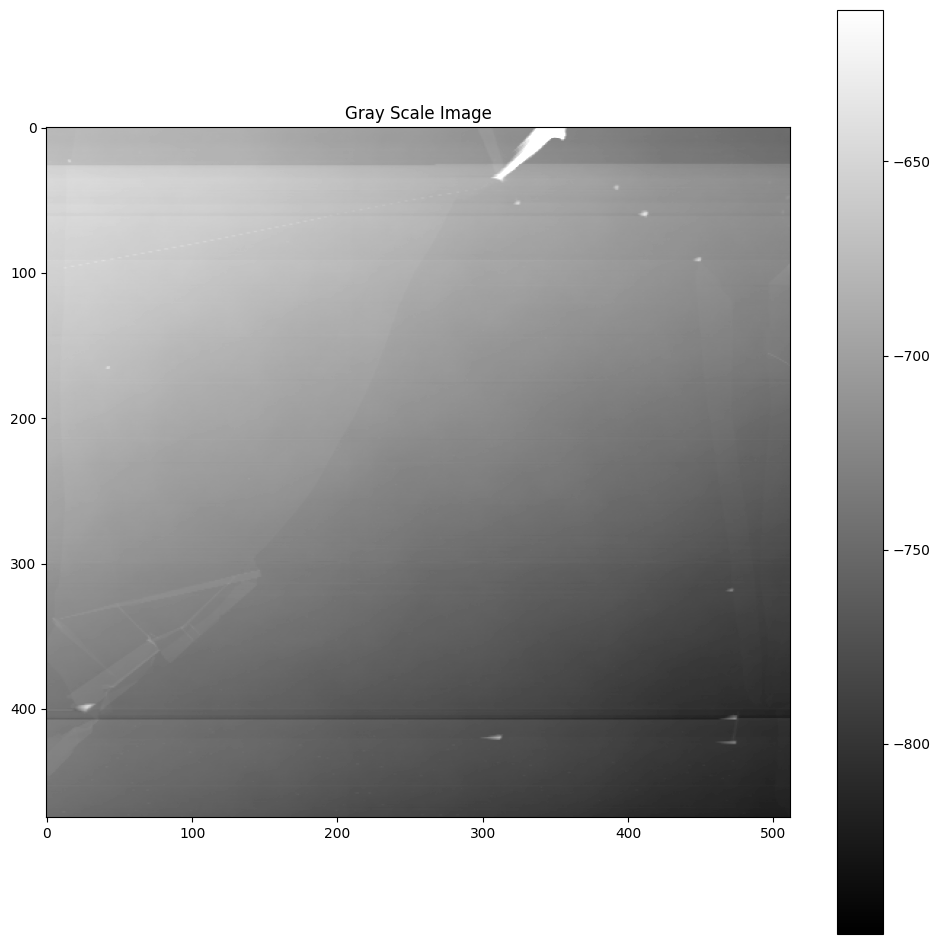

In [21]:
gray_img(data,-849,-611)

In [240]:
ls=[]
for i in range(0,flatten_data.shape[0]):
    ls.append(flatten_data[i,].std())#/math.fabs(flatten_data[i,].mean()))

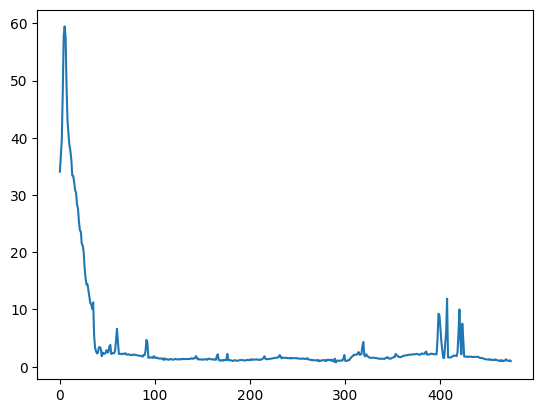

In [241]:
plt.plot(ls)
plt.show()

In [293]:
flatten_data = flatten(data)

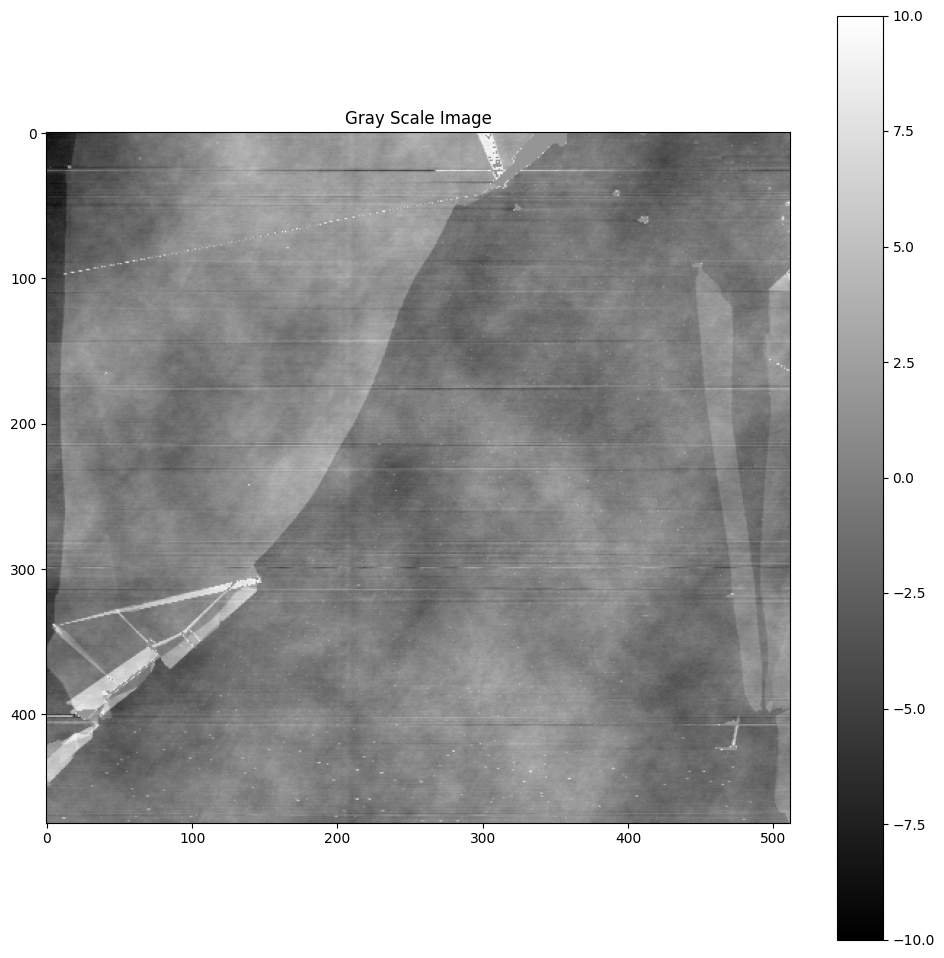

In [294]:
gray_img(flatten_data)

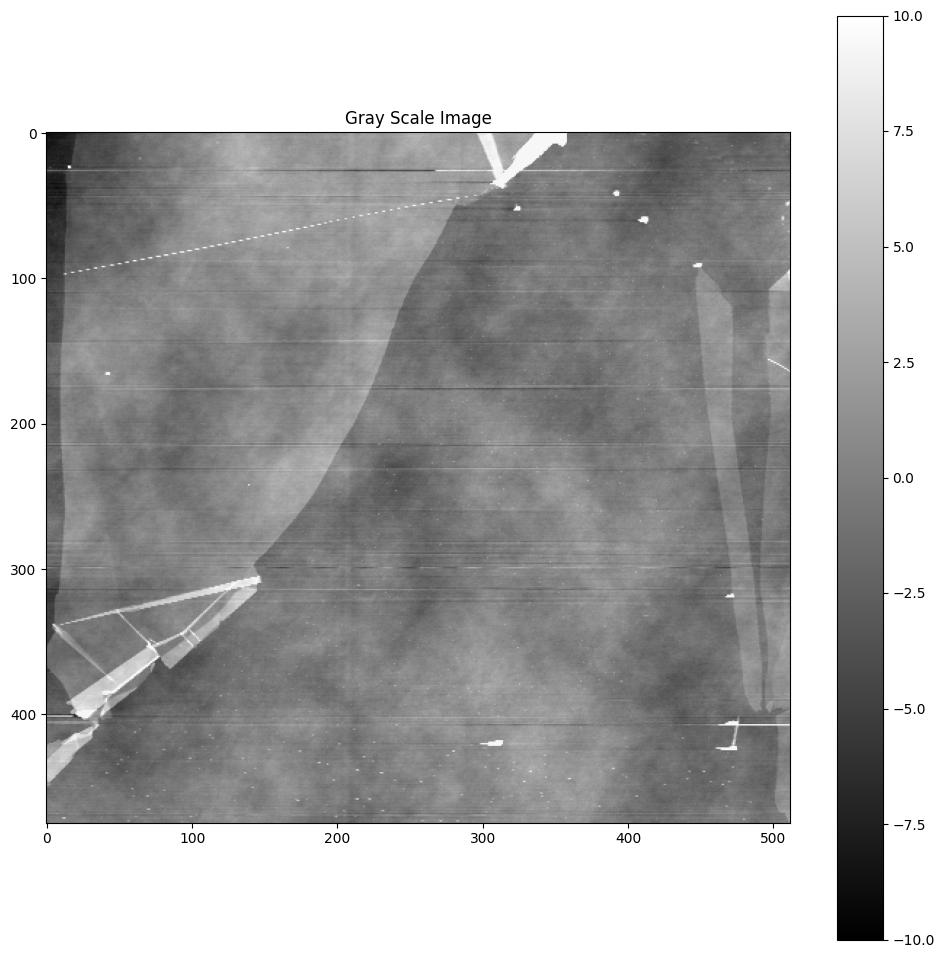

In [247]:
gray_img(flatten_data)

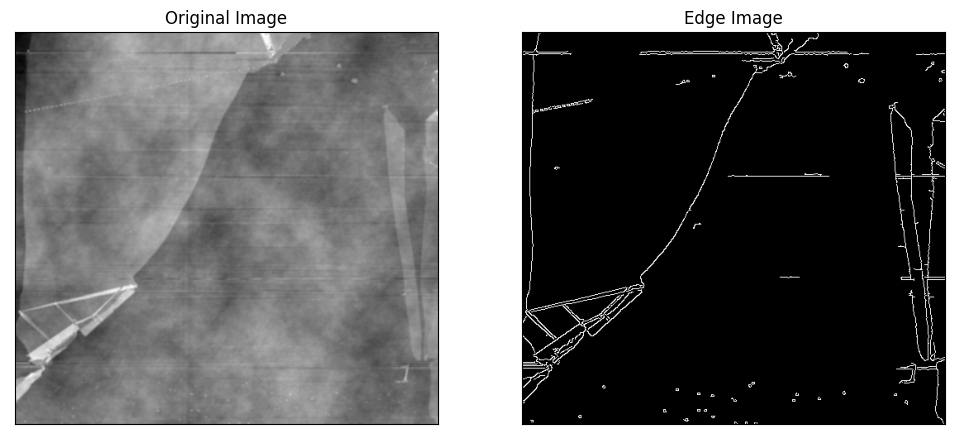

In [296]:
flat_mat = flatten_data
#flat_mat = flat_mat[100:300,]

# 将图像数据缩放到0到255的范围内
scaled_image = cv2.normalize(flat_mat, None, 0, 255, cv2.NORM_MINMAX)


# 将数据类型转换为 uint8
uint8_image = scaled_image.astype(np.uint8)
uint8_image=cv2.GaussianBlur(uint8_image,(3,3),2)

# 使用 Canny 边界检测算法
threshold1 = 40  # 调整合适的值
threshold2 = 100  # 调整合适的值
edges = cv2.Canny(uint8_image, threshold1, threshold2)

# 可视化原始图像和边界
plt.figure(figsize=(12, 12))
plt.subplot(121), plt.imshow(uint8_image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(edges, cmap='gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()


In [301]:
[row, col] = np.where(edges > 0)
bound = np.zeros_like(data)
bound[row, col] = 1

array([  0,   0,   0, ..., 474, 474, 474], dtype=int64)

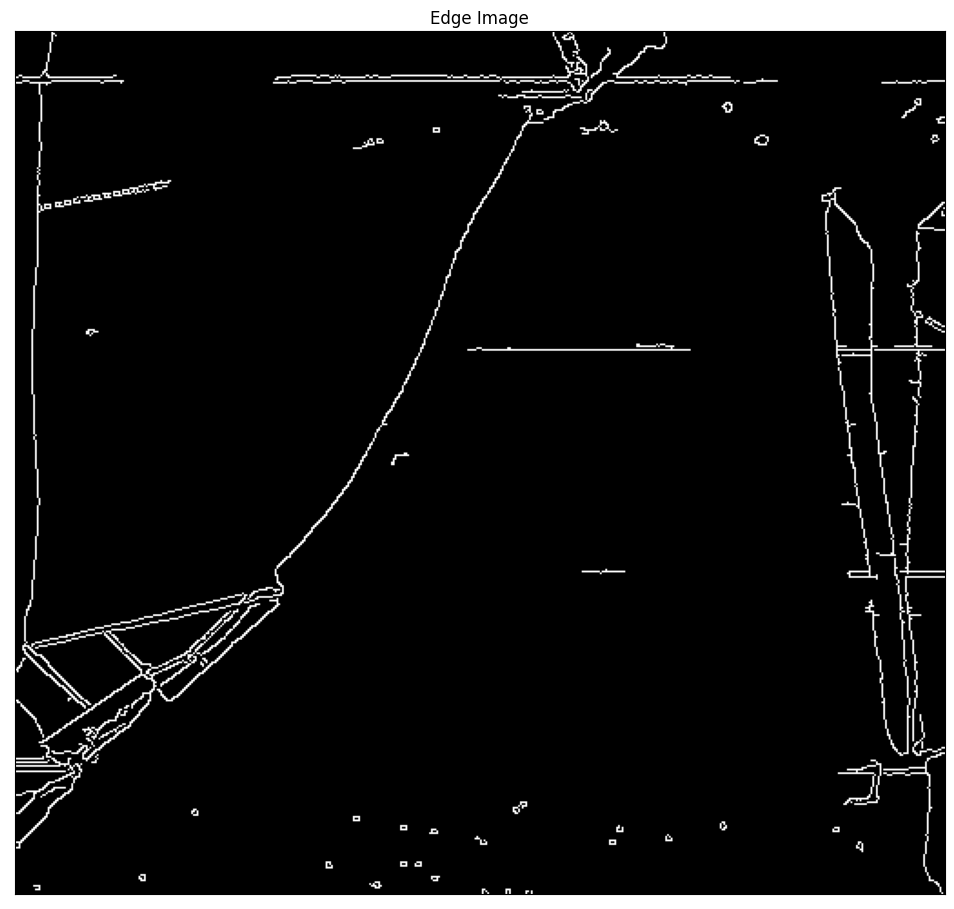

In [305]:
plt.figure(figsize=(12, 12))
plt.imshow(bound, cmap='gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()